In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
app_train=pd.read_csv(r'C:\Users\PoYu\jupyter\Example_and_data\application_train.csv')
app_test=pd.read_csv(r'C:\Users\PoYu\jupyter\Example_and_data\application_test.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 觀察聘雇天數 'DAYS_EMPLOYED' 內的數值
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [4]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df=app_train[app_train['DAYS_EMPLOYED']!=365243]

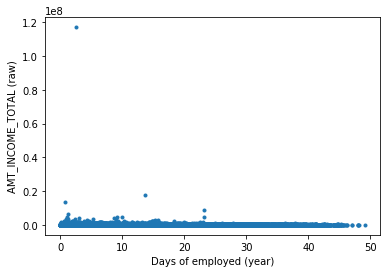

Correlation: 0.0130


In [5]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED']/(-365), sub_df['AMT_INCOME_TOTAL'],'.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

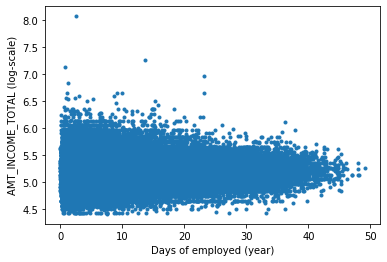

Correlation: 0.0380


In [6]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

In [7]:
#區分數字與字串欄位類型
num_features=[]
corrlist=[]
for dtype, feature in zip(app_train.dtypes,app_train.columns):
    if dtype=='float64' or dtype=='int64':
        num_features.append(feature)
        '''corr = np.corrcoef(app_train['TARGET'] ,app_train[feature])
        corrlist.append(corr[0][1])
        print(feature)
        print("Correlation: %.4f" % (corr[0][1]))
        print("-----------------")
        app_train[app_train[feature].notnull()].boxplot(column=[feature],by=['TARGET'])
        plt.show()'''

In [8]:
df=app_train[num_features]
df_mn=df.fillna(df.mean())
df_mn.head()
df_mn.isnull().sum().sort_values(ascending=False).head()

AMT_REQ_CREDIT_BUREAU_YEAR    0
REG_CITY_NOT_LIVE_CITY        0
LIVE_CITY_NOT_WORK_CITY       0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
dtype: int64

SK_ID_CURR
Correlation: -0.0021
-----------------


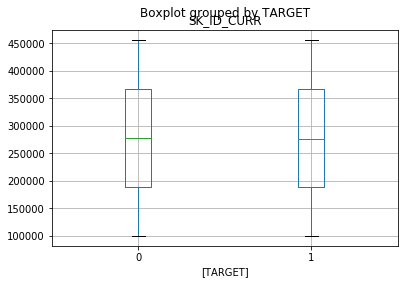

TARGET
Correlation: 1.0000
-----------------


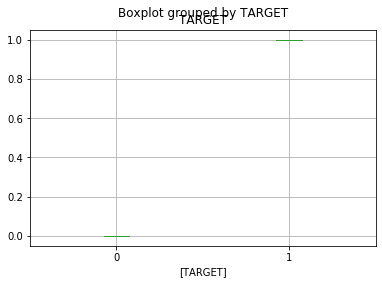

CNT_CHILDREN
Correlation: 0.0192
-----------------


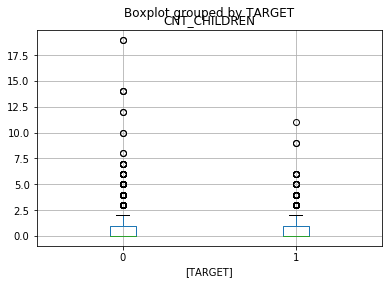

AMT_INCOME_TOTAL
Correlation: -0.0040
-----------------


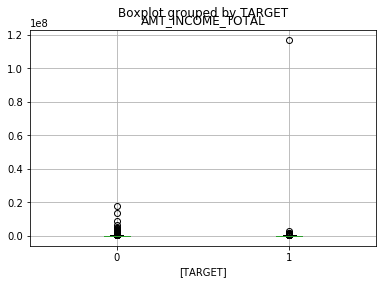

AMT_CREDIT
Correlation: -0.0304
-----------------


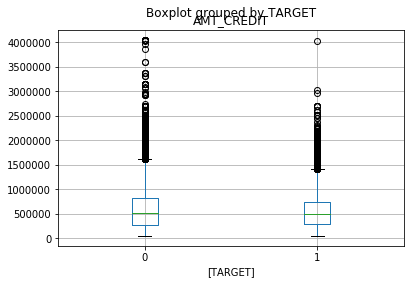

AMT_ANNUITY
Correlation: -0.0128
-----------------


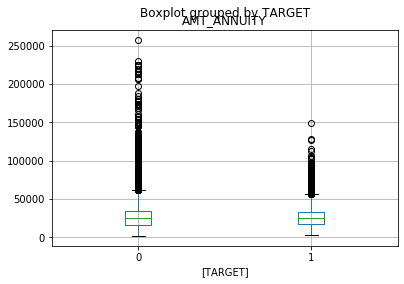

AMT_GOODS_PRICE
Correlation: -0.0396
-----------------


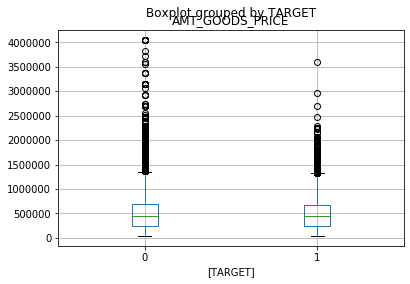

REGION_POPULATION_RELATIVE
Correlation: -0.0372
-----------------


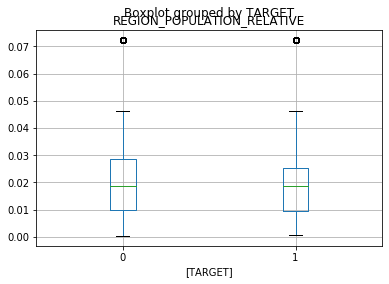

DAYS_BIRTH
Correlation: 0.0782
-----------------


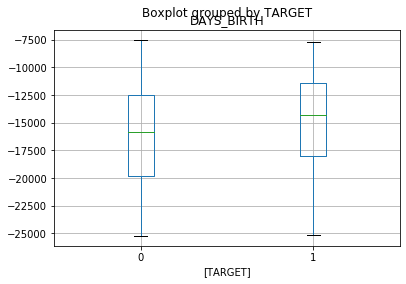

DAYS_EMPLOYED
Correlation: -0.0449
-----------------


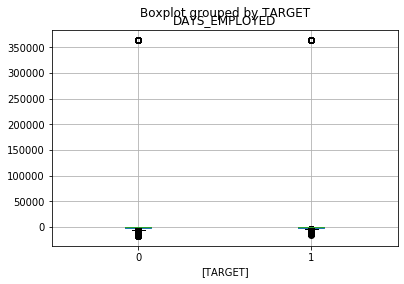

DAYS_REGISTRATION
Correlation: 0.0420
-----------------


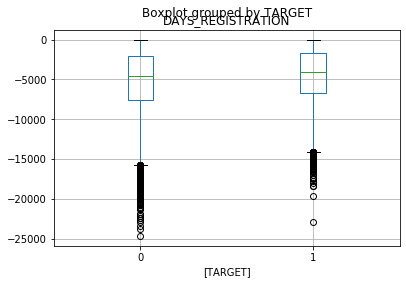

DAYS_ID_PUBLISH
Correlation: 0.0515
-----------------


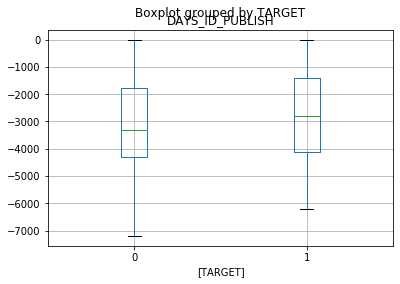

OWN_CAR_AGE
Correlation: 0.0209
-----------------


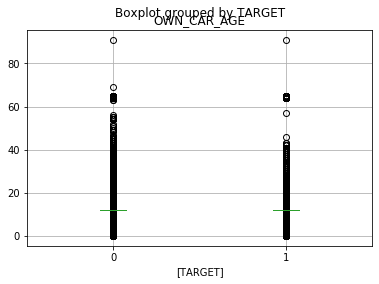

FLAG_MOBIL
Correlation: 0.0005
-----------------


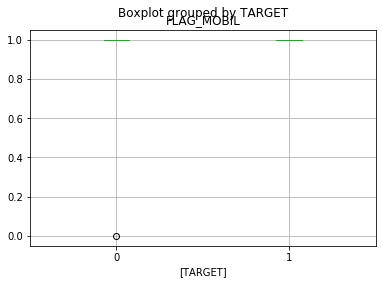

FLAG_EMP_PHONE
Correlation: 0.0460
-----------------


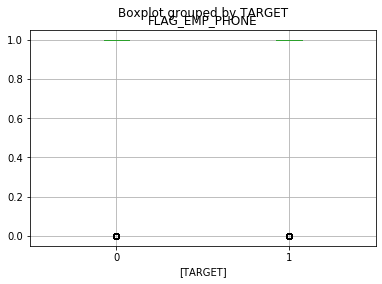

FLAG_WORK_PHONE
Correlation: 0.0285
-----------------


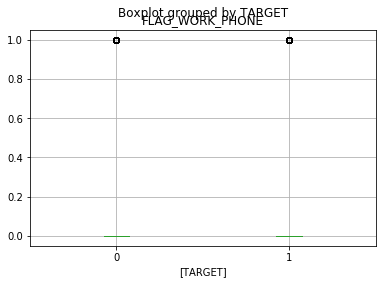

FLAG_CONT_MOBILE
Correlation: 0.0004
-----------------


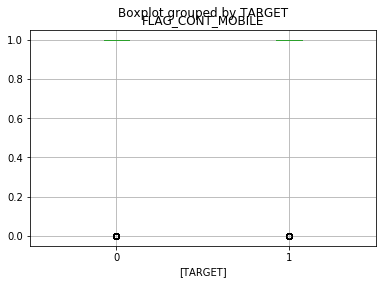

FLAG_PHONE
Correlation: -0.0238
-----------------


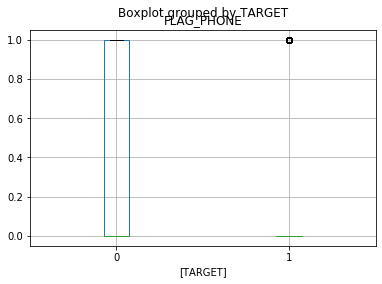

FLAG_EMAIL
Correlation: -0.0018
-----------------


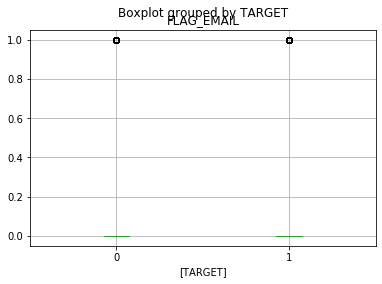

CNT_FAM_MEMBERS
Correlation: 0.0093
-----------------


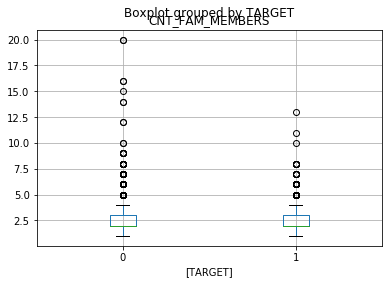

REGION_RATING_CLIENT
Correlation: 0.0589
-----------------


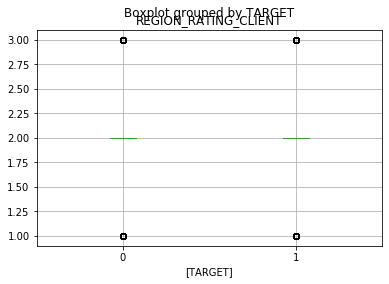

REGION_RATING_CLIENT_W_CITY
Correlation: 0.0609
-----------------


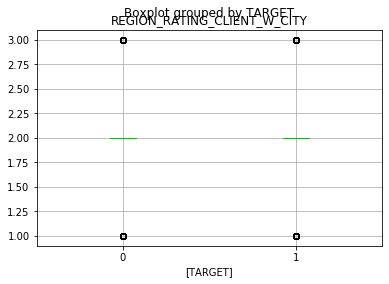

HOUR_APPR_PROCESS_START
Correlation: -0.0242
-----------------


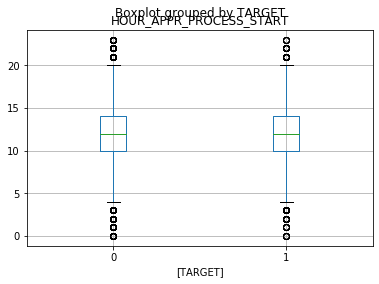

REG_REGION_NOT_LIVE_REGION
Correlation: 0.0056
-----------------


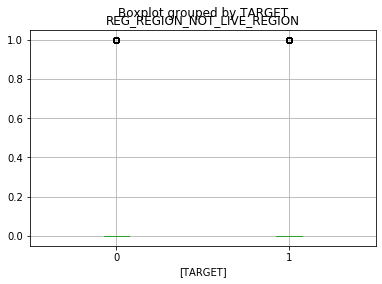

REG_REGION_NOT_WORK_REGION
Correlation: 0.0069
-----------------


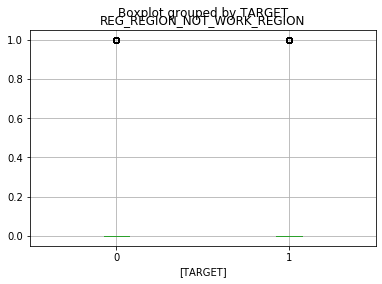

LIVE_REGION_NOT_WORK_REGION
Correlation: 0.0028
-----------------


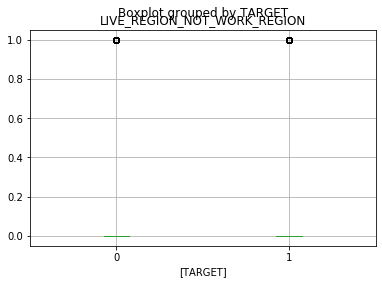

REG_CITY_NOT_LIVE_CITY
Correlation: 0.0444
-----------------


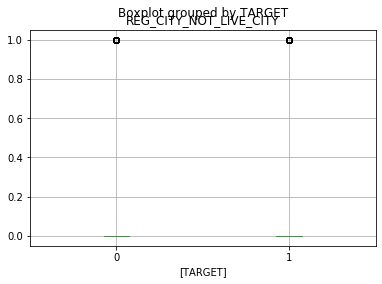

REG_CITY_NOT_WORK_CITY
Correlation: 0.0510
-----------------


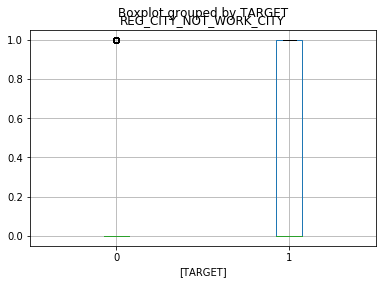

LIVE_CITY_NOT_WORK_CITY
Correlation: 0.0325
-----------------


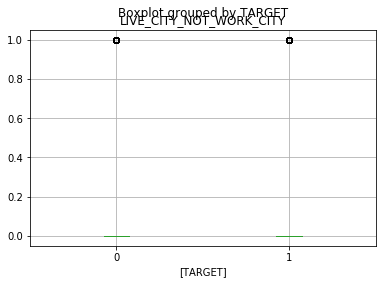

EXT_SOURCE_1
Correlation: -0.0992
-----------------


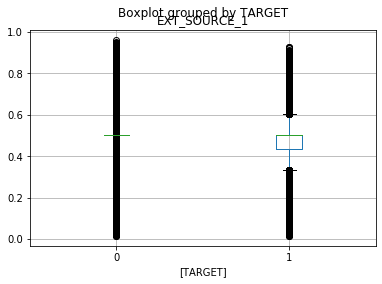

EXT_SOURCE_2
Correlation: -0.1603
-----------------


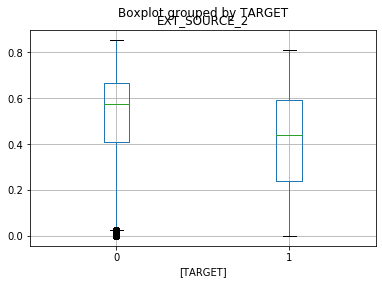

EXT_SOURCE_3
Correlation: -0.1574
-----------------


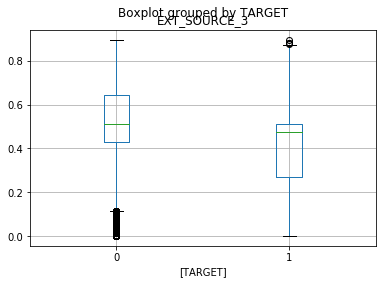

APARTMENTS_AVG
Correlation: -0.0193
-----------------


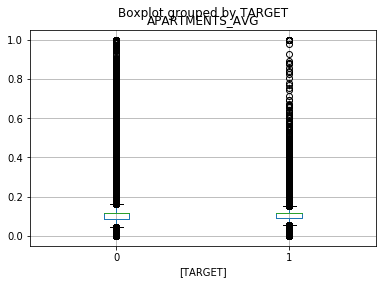

BASEMENTAREA_AVG
Correlation: -0.0136
-----------------


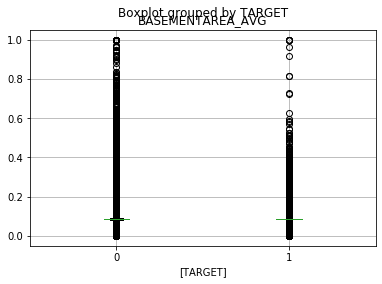

YEARS_BEGINEXPLUATATION_AVG
Correlation: -0.0065
-----------------


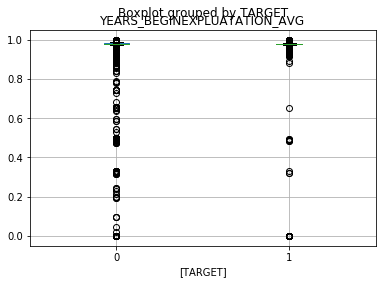

YEARS_BUILD_AVG
Correlation: -0.0119
-----------------


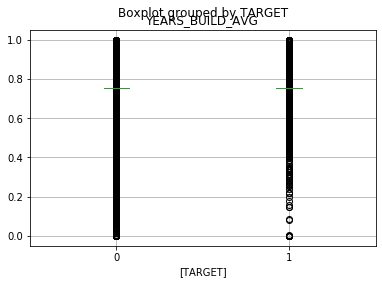

COMMONAREA_AVG
Correlation: -0.0095
-----------------


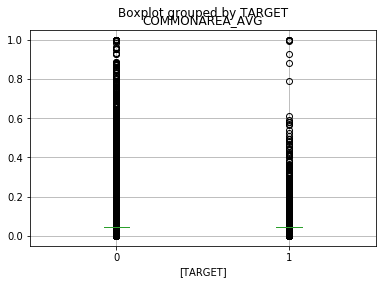

ELEVATORS_AVG
Correlation: -0.0217
-----------------


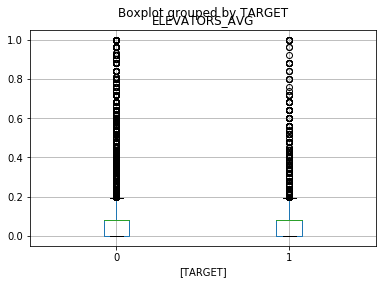

ENTRANCES_AVG
Correlation: -0.0126
-----------------


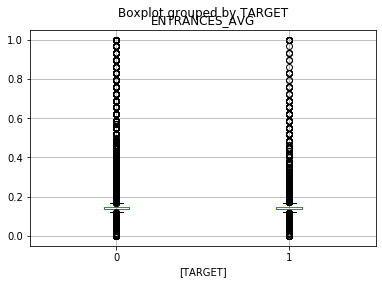

FLOORSMAX_AVG
Correlation: -0.0291
-----------------


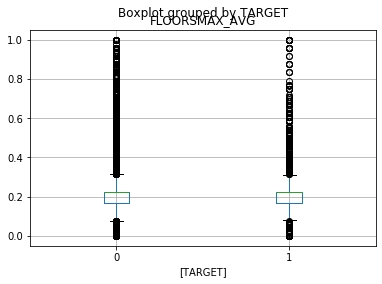

FLOORSMIN_AVG
Correlation: -0.0177
-----------------


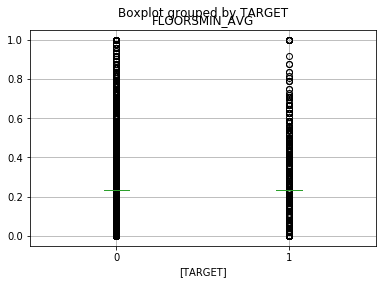

LANDAREA_AVG
Correlation: -0.0065
-----------------


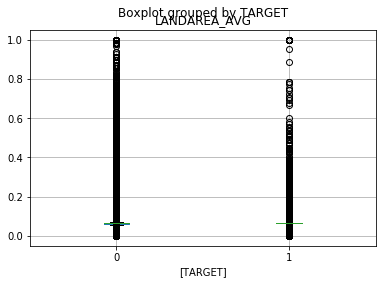

LIVINGAPARTMENTS_AVG
Correlation: -0.0131
-----------------


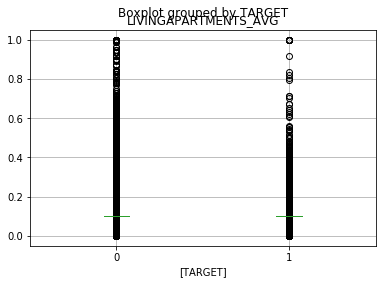

LIVINGAREA_AVG
Correlation: -0.0218
-----------------


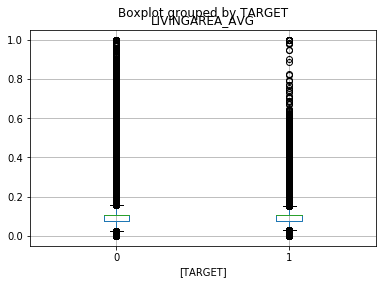

NONLIVINGAPARTMENTS_AVG
Correlation: -0.0016
-----------------


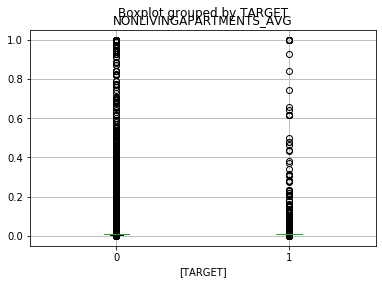

NONLIVINGAREA_AVG
Correlation: -0.0085
-----------------


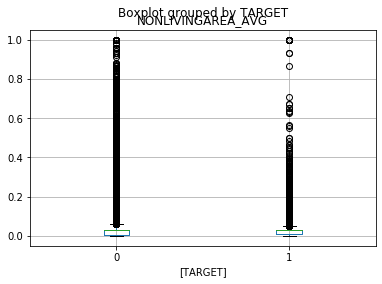

APARTMENTS_MODE
Correlation: -0.0179
-----------------


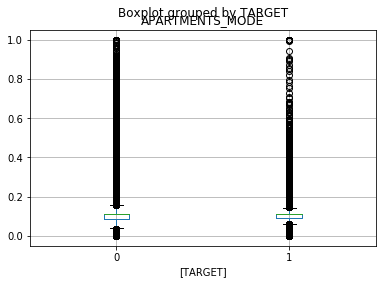

BASEMENTAREA_MODE
Correlation: -0.0119
-----------------


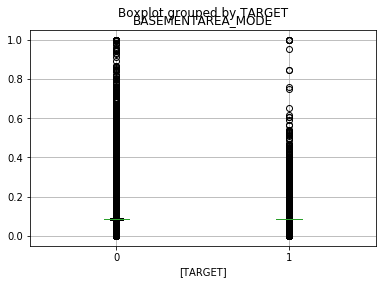

YEARS_BEGINEXPLUATATION_MODE
Correlation: -0.0061
-----------------


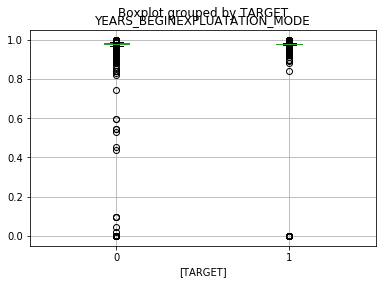

YEARS_BUILD_MODE
Correlation: -0.0119
-----------------


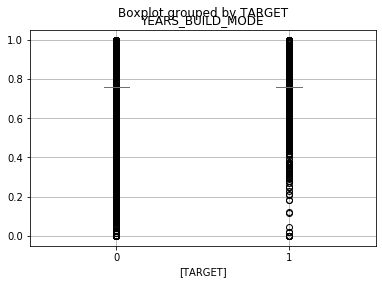

COMMONAREA_MODE
Correlation: -0.0084
-----------------


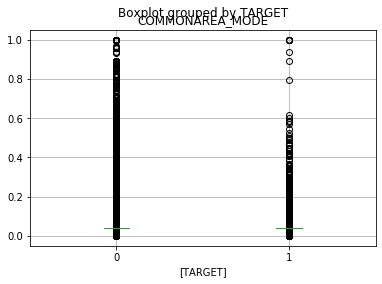

ELEVATORS_MODE
Correlation: -0.0204
-----------------


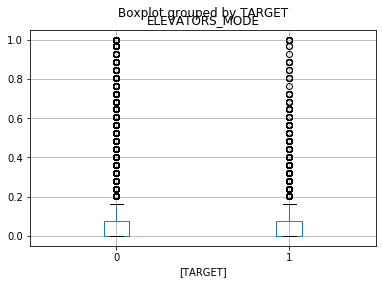

ENTRANCES_MODE
Correlation: -0.0114
-----------------


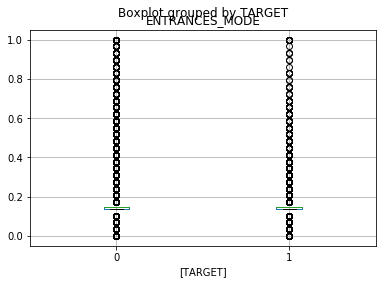

FLOORSMAX_MODE
Correlation: -0.0286
-----------------


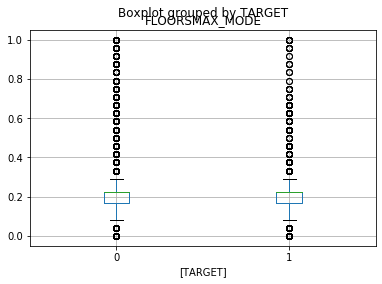

FLOORSMIN_MODE
Correlation: -0.0172
-----------------


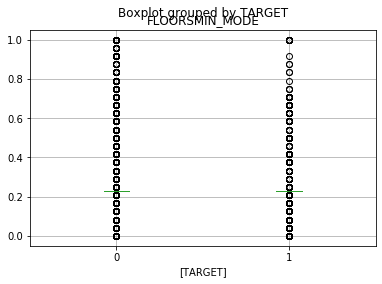

LANDAREA_MODE
Correlation: -0.0061
-----------------


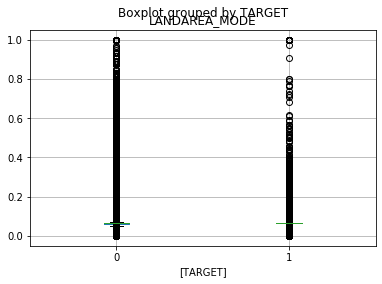

LIVINGAPARTMENTS_MODE
Correlation: -0.0122
-----------------


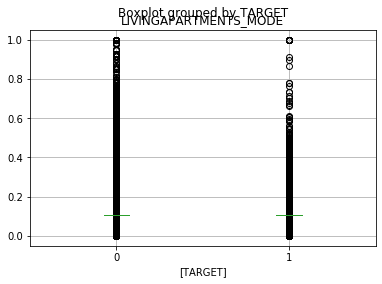

LIVINGAREA_MODE
Correlation: -0.0203
-----------------


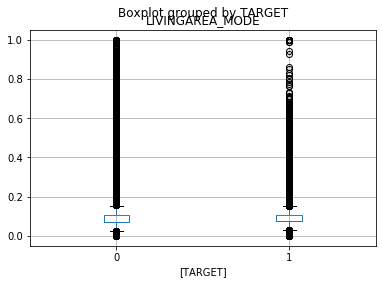

NONLIVINGAPARTMENTS_MODE
Correlation: -0.0008
-----------------


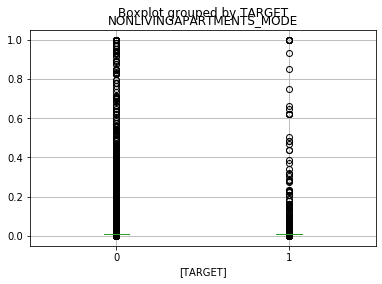

NONLIVINGAREA_MODE
Correlation: -0.0079
-----------------


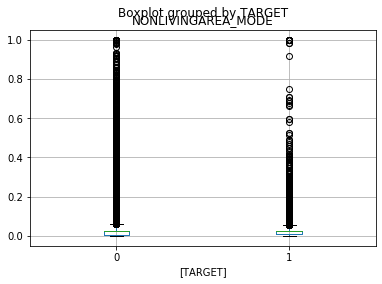

APARTMENTS_MEDI
Correlation: -0.0191
-----------------


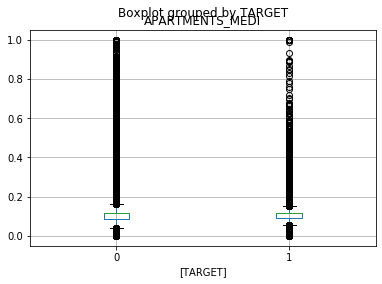

BASEMENTAREA_MEDI
Correlation: -0.0132
-----------------


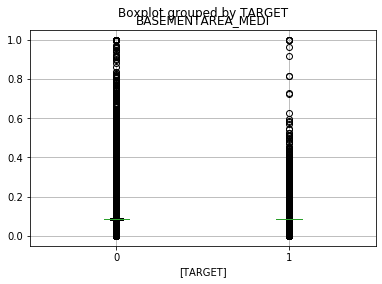

YEARS_BEGINEXPLUATATION_MEDI
Correlation: -0.0067
-----------------


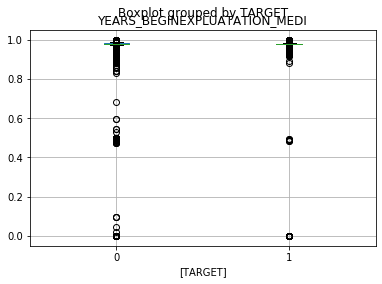

YEARS_BUILD_MEDI
Correlation: -0.0120
-----------------


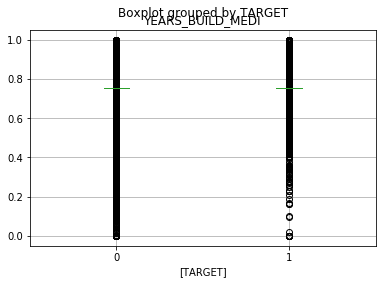

COMMONAREA_MEDI
Correlation: -0.0095
-----------------


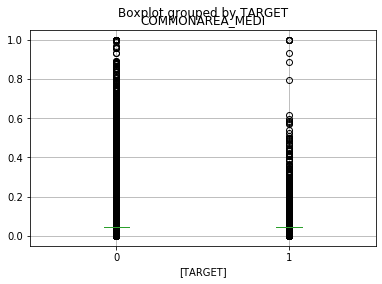

ELEVATORS_MEDI
Correlation: -0.0215
-----------------


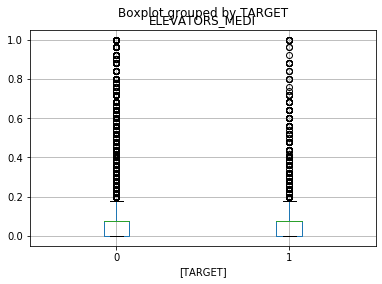

ENTRANCES_MEDI
Correlation: -0.0125
-----------------


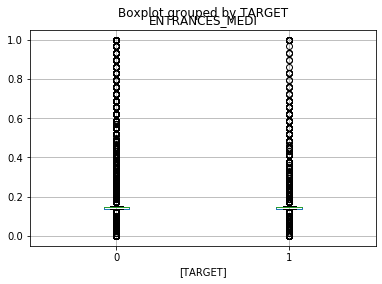

FLOORSMAX_MEDI
Correlation: -0.0290
-----------------


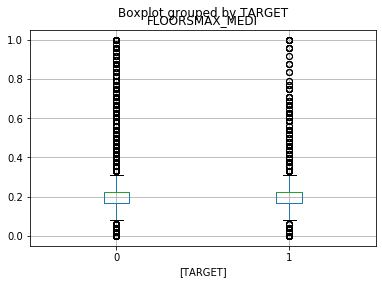

FLOORSMIN_MEDI
Correlation: -0.0176
-----------------


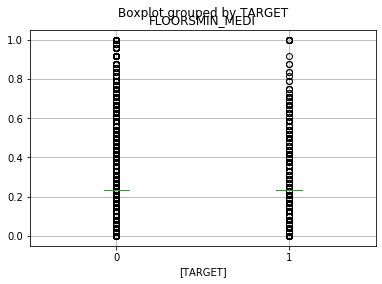

LANDAREA_MEDI
Correlation: -0.0067
-----------------


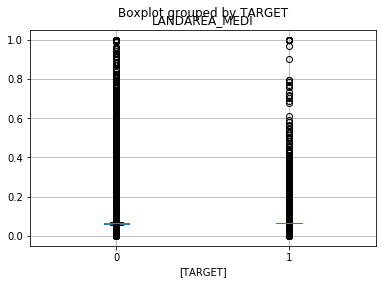

LIVINGAPARTMENTS_MEDI
Correlation: -0.0129
-----------------


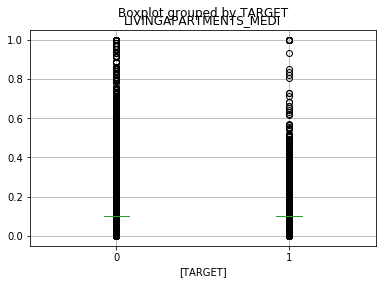

LIVINGAREA_MEDI
Correlation: -0.0216
-----------------


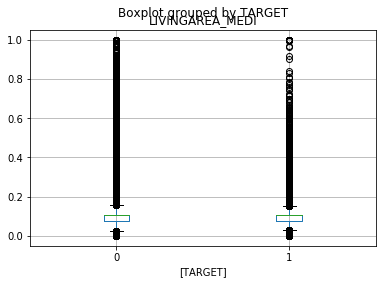

NONLIVINGAPARTMENTS_MEDI
Correlation: -0.0014
-----------------


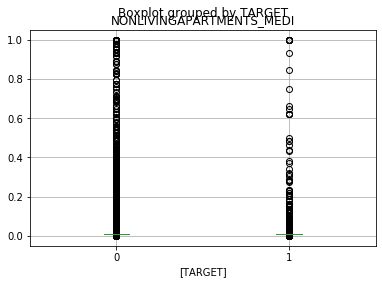

NONLIVINGAREA_MEDI
Correlation: -0.0083
-----------------


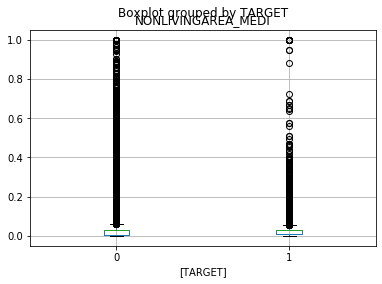

TOTALAREA_MODE
Correlation: -0.0219
-----------------


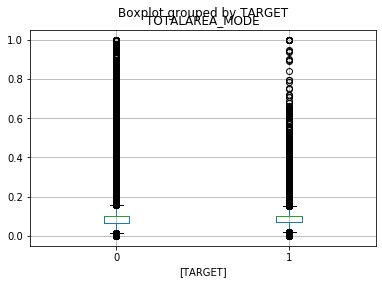

OBS_30_CNT_SOCIAL_CIRCLE
Correlation: 0.0091
-----------------


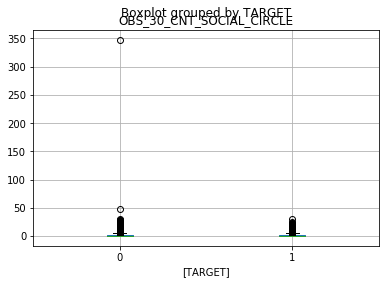

DEF_30_CNT_SOCIAL_CIRCLE
Correlation: 0.0322
-----------------


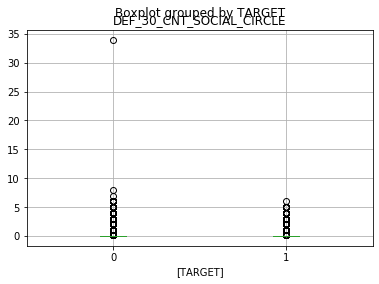

OBS_60_CNT_SOCIAL_CIRCLE
Correlation: 0.0090
-----------------


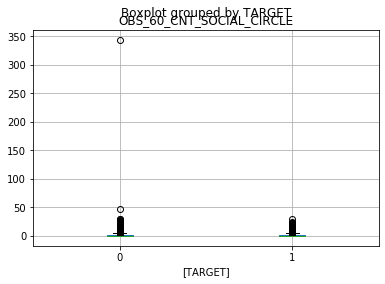

DEF_60_CNT_SOCIAL_CIRCLE
Correlation: 0.0313
-----------------


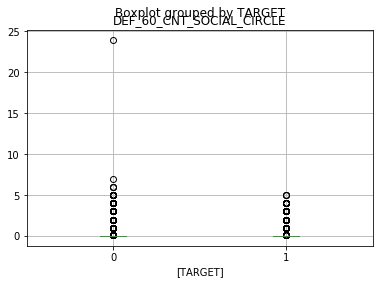

DAYS_LAST_PHONE_CHANGE
Correlation: 0.0552
-----------------


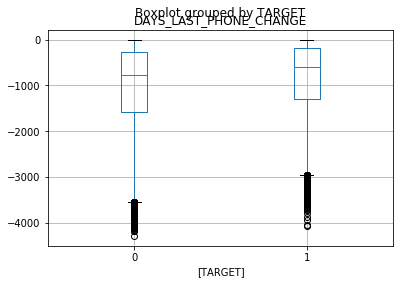

FLAG_DOCUMENT_2
Correlation: 0.0054
-----------------


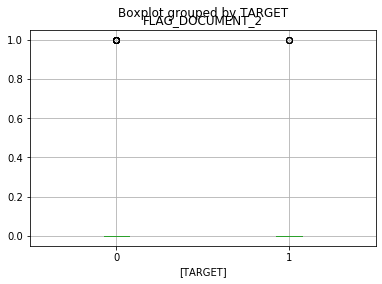

FLAG_DOCUMENT_3
Correlation: 0.0443
-----------------


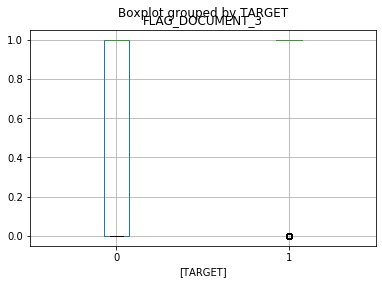

FLAG_DOCUMENT_4
Correlation: -0.0027
-----------------


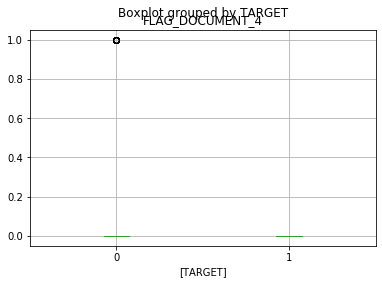

FLAG_DOCUMENT_5
Correlation: -0.0003
-----------------


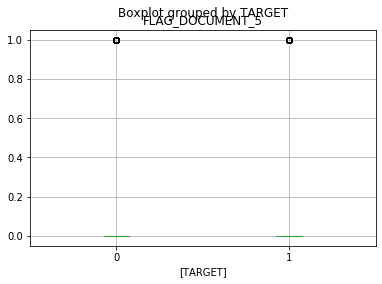

FLAG_DOCUMENT_6
Correlation: -0.0286
-----------------


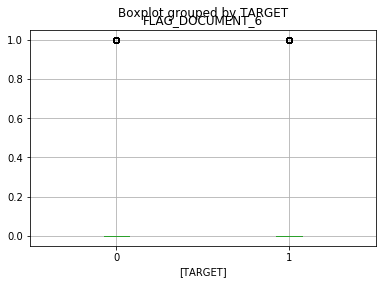

FLAG_DOCUMENT_7
Correlation: -0.0015
-----------------


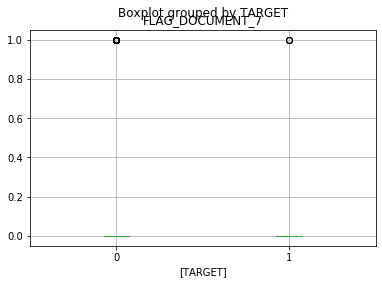

FLAG_DOCUMENT_8
Correlation: -0.0080
-----------------


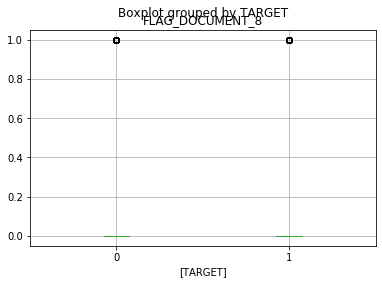

FLAG_DOCUMENT_9
Correlation: -0.0044
-----------------


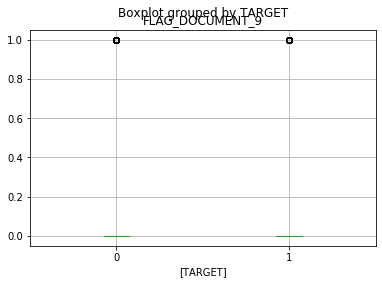

FLAG_DOCUMENT_10
Correlation: -0.0014
-----------------


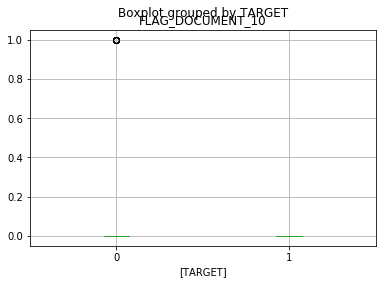

FLAG_DOCUMENT_11
Correlation: -0.0042
-----------------


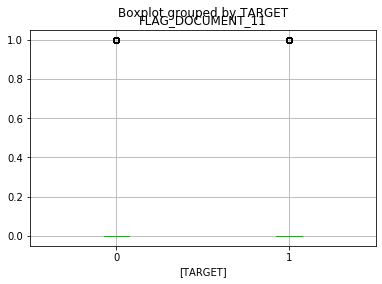

FLAG_DOCUMENT_12
Correlation: -0.0008
-----------------


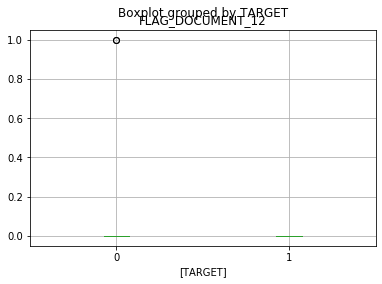

FLAG_DOCUMENT_13
Correlation: -0.0116
-----------------


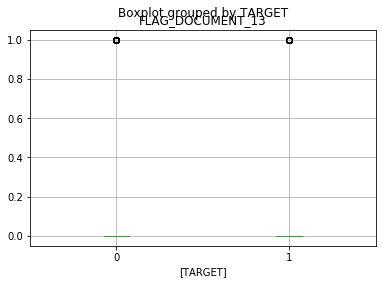

FLAG_DOCUMENT_14
Correlation: -0.0095
-----------------


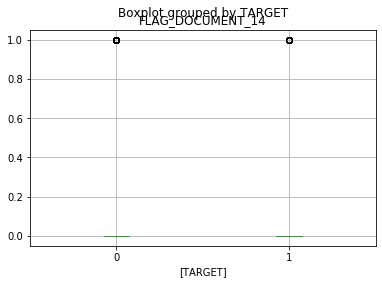

FLAG_DOCUMENT_15
Correlation: -0.0065
-----------------


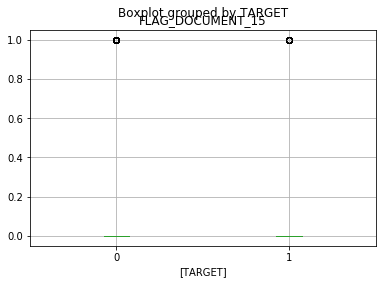

FLAG_DOCUMENT_16
Correlation: -0.0116
-----------------


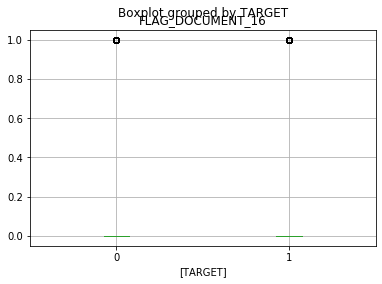

FLAG_DOCUMENT_17
Correlation: -0.0034
-----------------


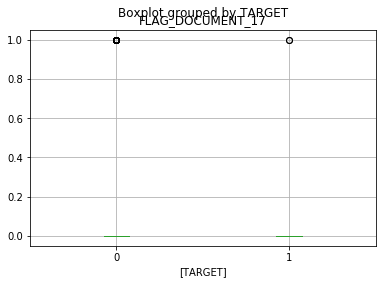

FLAG_DOCUMENT_18
Correlation: -0.0080
-----------------


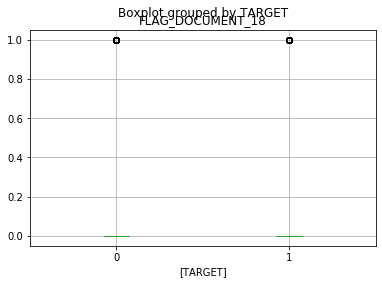

FLAG_DOCUMENT_19
Correlation: -0.0014
-----------------


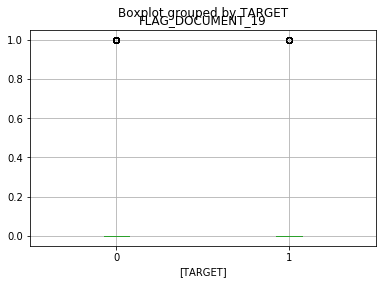

FLAG_DOCUMENT_20
Correlation: 0.0002
-----------------


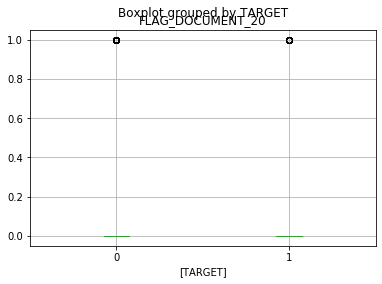

FLAG_DOCUMENT_21
Correlation: 0.0037
-----------------


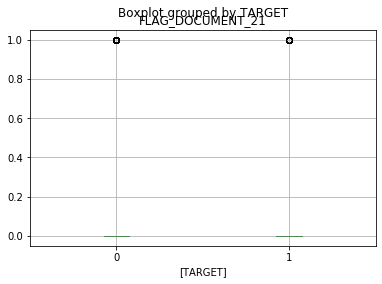

AMT_REQ_CREDIT_BUREAU_HOUR
Correlation: 0.0008
-----------------


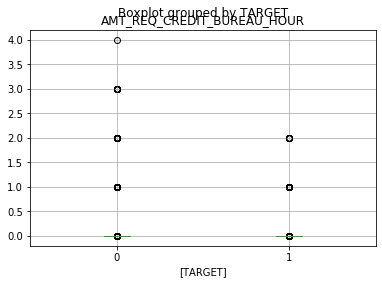

AMT_REQ_CREDIT_BUREAU_DAY
Correlation: 0.0025
-----------------


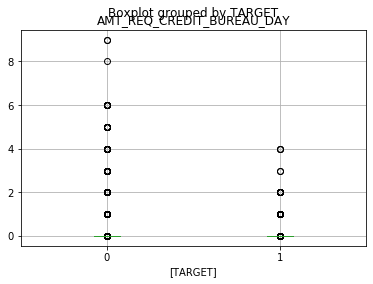

AMT_REQ_CREDIT_BUREAU_WEEK
Correlation: 0.0007
-----------------


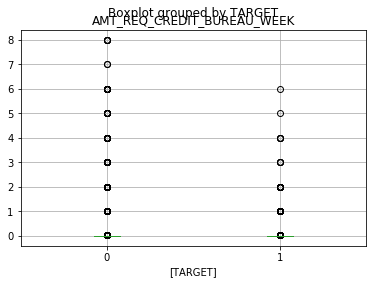

AMT_REQ_CREDIT_BUREAU_MON
Correlation: -0.0114
-----------------


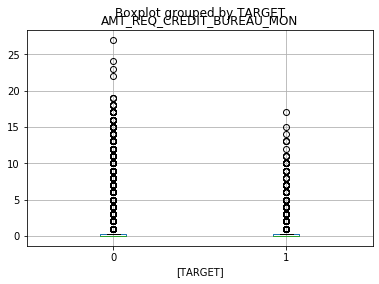

AMT_REQ_CREDIT_BUREAU_QRT
Correlation: -0.0018
-----------------


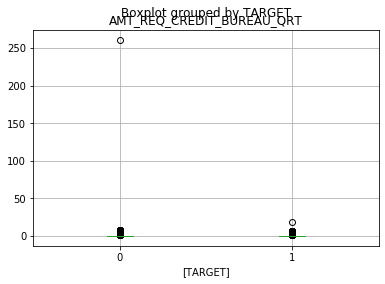

AMT_REQ_CREDIT_BUREAU_YEAR
Correlation: 0.0182
-----------------


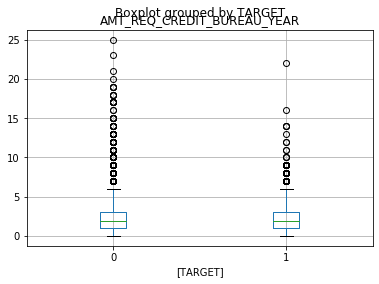

In [13]:
for feature in df_mn.columns:
    corr = np.corrcoef(df_mn['TARGET'] , df_mn[feature])
    print(feature)
    print("Correlation: %.4f" % (corr[0][1]))
    print("-----------------")
    df_mn[df_mn[feature].notnull()].boxplot(column=[feature],by=['TARGET'])
    plt.show()